<a href="https://colab.research.google.com/github/lucasdonizete/RedesNeurais/blob/main/Trabalho_02DOGS_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random

In [2]:
!gdown --id 1CoPQHEJx2P-p2RqjyEwTRDp2vMQUeAOw #comando que baixa do google drive

Downloading...
From: https://drive.google.com/uc?id=1CoPQHEJx2P-p2RqjyEwTRDp2vMQUeAOw
To: /content/FOTOS_DOGS_ALL.zip
12.9MB [00:00, 113MB/s]


In [3]:
import zipfile
file_name = zipfile.ZipFile('FOTOS_DOGS_ALL.zip', 'r')
file_name.extractall()

In [4]:
# all images are load in variable x...
FILE='FOTOS_DOGS_ALL.zip'
Img_Size = 160
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #x_gray.append(cv2.imread(name, 0))
        x_gray.append(cv2.resize(cv2.imread(name, 0),(Img_Size,Img_Size)))

In [5]:
y_names = [] # colocou as tres primeiras letras e colocou na lista de todas as imagens
for yy in img_name:
  name = yy[17]+yy[18]+yy[19]
  y_names.append(name)

In [6]:
unique_list = []    
for yy in y_names: #criacao das listas da ann
  if yy not in unique_list:
    unique_list.append(yy)
unique_list #criou as categorias dos peixes

['BAS', 'BUL', 'LAB', 'POO']

In [7]:
n = len(unique_list)
y = [] #lista em branco
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

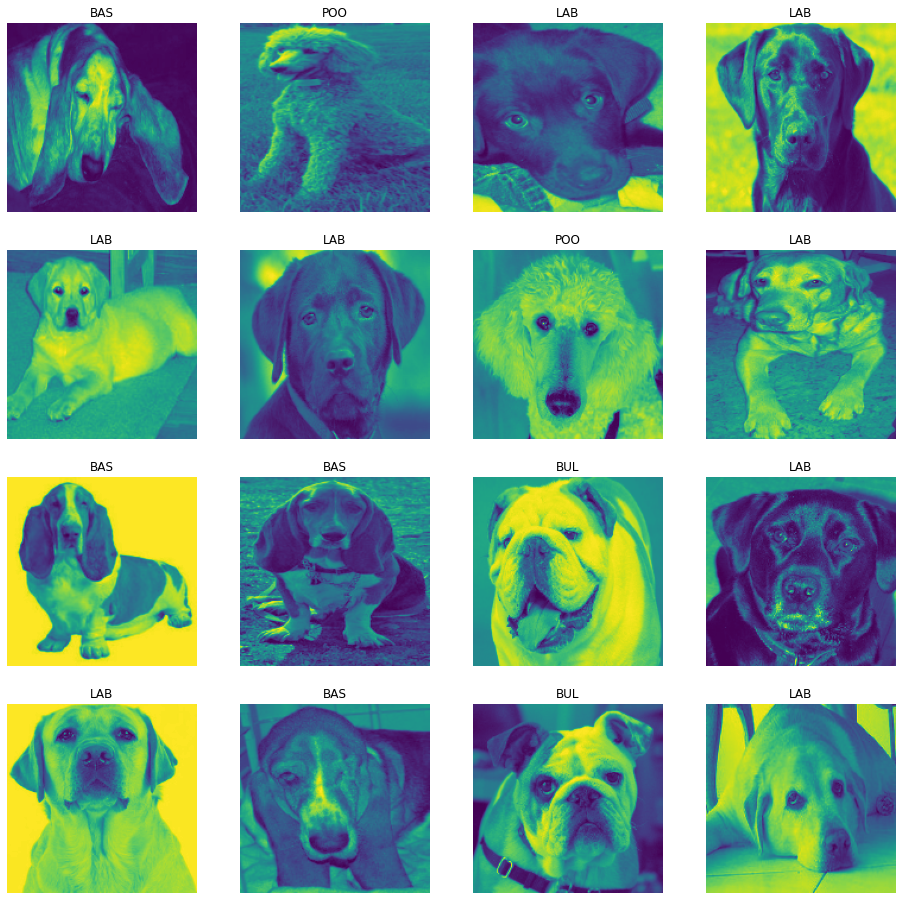

In [8]:
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(16): #mostra fotos aleatorias da biblioteca
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_gray[kk])
  plt.title(y_names[kk])
  plt.axis("off")

In [9]:
x_data = []
for xx in x_gray:
  x_data.append(xx.ravel()) #transforma as fotos/matrizes em linhas (Esse eh um comando que demora um pouco para ser executado)

X = pd.DataFrame(x_data)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=3) #separando os dataset em test e train

In [11]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X) #normalizar
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

In [12]:
model = MLPClassifier(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(25,18),
                      max_iter=1000,random_state=1) #implementacao da ANN

In [13]:
model.fit(X_train, y_train) #esse eh outro comando que demora para ser executado

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25, 18), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [14]:
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [15]:
df = pd.DataFrame({'true':y_train,'calc':y_calc_train})
print(pd.crosstab(df['true'],df['calc'])) #matriz confusao dos dados de treino da ANN
#bons resultados porque formou uma matriz diagonal

calc    0   1    2   3
true                  
0     121   1    0   0
1       0  99    0   0
2       0   0  130   0
3       0   0    0  98


In [16]:
df = pd.DataFrame({'true':y_test,'calc':y_calc_test})
print(pd.crosstab(df['true'],df['calc'])) #matriz confusado dos dados de teste
#Nao eh uma matriz diagonal, isso indica que a ann 'confundiu' na hora de classificar as imagens

calc   0   1   2  3
true               
0     11   9  10  7
1      4  10   9  3
2      4   3  17  7
3      4   2   6  7


In [17]:
y_true = y_test
y_pred = y_calc_test
target_names = ['Basset', 'Bulldog', 'Labrador', 'Poodle']
print(classification_report(y_true, y_pred, target_names=target_names))
#matriz confusao com a acuracia global do problema de 0.88

              precision    recall  f1-score   support

      Basset       0.48      0.30      0.37        37
     Bulldog       0.42      0.38      0.40        26
    Labrador       0.40      0.55      0.47        31
      Poodle       0.29      0.37      0.33        19

    accuracy                           0.40       113
   macro avg       0.40      0.40      0.39       113
weighted avg       0.41      0.40      0.39       113

